<a href="https://colab.research.google.com/github/JUD210/AIFFEL_quest_cr/blob/main/Python/DA01/da_with_py_6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# 6-1. 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다

# 라이브러리 버전 확인
import sklearn
print(f"sklearn version: {sklearn.__version__}")

sklearn version: 1.3.2


In [11]:
# (1) 필요한 모듈 import하기
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression


In [12]:
# (2) 데이터 준비
digits = load_digits()
print(type(digits))
print(digits.keys())

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [13]:
# (3) 데이터 이해하기
# Feature Data 지정하기
X = digits.data
print("\nX: ", X)
print("\nData Shape:", X.shape)
print("\nFeature Data Sample: ", X[0])
print("\nFeature Names:", digits.feature_names)
print("len(digits.feature_names): ", len(digits.feature_names))

# Label Data 지정하기
y = digits.target
print("Label Shape:", y.shape)
print("\nLabel Data Sample: ", y[0])

# Target Names 출력해 보기
print("Target Names:", digits.target_names)
print("len(digits.target_names): ", len(digits.target_names))

# 데이터 Describe 해 보기

print("\nDescription:")
print(digits.DESCR)



X:  [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]

Data Shape: (1797, 64)

Feature Data Sample:  [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

Feature Names: ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4

In [14]:
# (4) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape, X_train[0])
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape, y_train[0])
print("y_test shape:", y_test.shape)

X_train shape: (1437, 64) [ 0.  0.  3. 14.  1.  0.  0.  0.  0.  0. 12. 12.  0.  0.  0.  0.  0.  3.
 16.  6.  0.  0.  0.  0.  0.  5. 16.  2.  0.  0.  0.  0.  0.  6. 16.  2.
  5.  2.  0.  0.  0.  4. 16.  2. 12. 15.  2.  0.  0.  1. 14. 13.  2. 13.
 11.  0.  0.  0.  3. 11. 16. 13.  4.  0.]
X_test shape: (360, 64)
y_train shape: (1437,) 6
y_test shape: (360,)


In [19]:
# (5) 다양한 모델로 학습시켜보기
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "SGD Classifier": SGDClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=3000, solver="saga")
    # "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')
    # 오류


}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"\n{name} trained.")



Decision Tree trained.

Random Forest trained.

SVM trained.

SGD Classifier trained.

Logistic Regression trained.


In [23]:
# (6) 모델을 평가해 보기

# for name, model in models.items():
#     y_pred = model.predict(X_test)

#     print(f"\n{name} 평가 결과:")


def evaluate_model(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1 Score': f1_score(y_true, y_pred, average='weighted')
    }

# 모델들의 평가 결과를 저장할 리스트 초기화
model_results = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    # 각 모델별 평가 결과 출력
    print(f"\n{name} 평가 결과:")
    print(classification_report(y_test, y_pred, target_names=digits.target_names.astype(str)))

    # 결과 저장
    results = evaluate_model(y_test, y_pred)
    results['Model'] = name
    model_results.append(results)

# 결과를 DataFrame으로 변환
df_results = pd.DataFrame(model_results).set_index('Model')

# 결과 출력
print("\n모델별 성능 비교 결과:")
print(df_results)



Decision Tree 평가 결과:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.85      0.79      0.81        28
           2       0.86      0.73      0.79        33
           3       0.76      0.85      0.81        34
           4       0.84      0.91      0.87        46
           5       0.89      0.85      0.87        47
           6       0.97      0.91      0.94        35
           7       0.82      0.91      0.86        34
           8       0.75      0.70      0.72        30
           9       0.75      0.82      0.79        40

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360


Random Forest 평가 결과:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00 

데이터셋의 특성에 따라 적절한 성능 평가 지표가 달라진다.
- 클래스가 균등하게 분포된 데이터셋에서는 Accuracy가 적합.
- 클래스 불균형이 심한 경우에는 Precision, Recall, 또는 F1-Score가 더 적합.

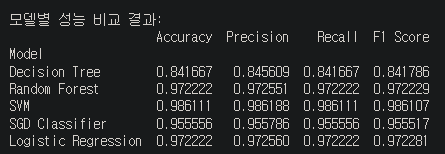

평가지표는 `Accuracy`를 선택
- Digits 데이터셋의 경우, 모든 클래스가 비슷한 비율로 존재하므로 모델이 얼마나 많은 샘플을 정확하게 분류했는지를 보는 것이 중요하기 때문.
- 모든 지표가 비슷하다는 것은, 모델이 특정 클래스에만 성능이 치우치지 않고, Precision과 Recall에서의 균형이 잘 잡혀 있다는 의미하기 때문.

# 6-1. 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다
우선 라이브러리 버전을 확인하고 진행할까요?**bold text**


```python
import sklearn

print(sklearn.__version__)
```

첫 번째 실습입니다.

아까 잠깐 다뤄보았던 손글씨 이미지를 제대로 0~9까지 열 가지 카테고리로 분류해 보는 실습을 해 보겠습니다.

(1) 필요한 모듈 import하기
```python
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
```

(2) 데이터 준비
load_digits 메서드를 사용합니다.

(3) 데이터 이해하기
지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴봅시다.

- Feature Data 지정하기
- Label Data 지정하기
- Target Names 출력해 보기
- 데이터 Describe 해 보기

(4) train, test 데이터 분리
모델 학습과 테스트용 문제지와 정답지를 준비해 봅시다.
- X_train, X_test, y_train, y_test를 생성하는 방법을 참고해 보세요.

(5) 다양한 모델로 학습시켜보기
학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어 봅시다. 어떤 모델이 가장 좋은 성능을 보일까요?

- Decision Tree 사용해 보기
- Random Forest 사용해 보기
- SVM 사용해 보기
- SGD Classifier 사용해 보기
- Logistic Regression 사용해 보기

(6) 모델을 평가해 보기
학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.